# Plot linear power parameters from extended Planck chains

This notebook shows how to read one of the extended Planck chains with linear power parameters.

It also compares the contours with the likelihoods on these parameters from Lya P1D.

In [1]:
import numpy as np
from getdist import plots,loadMCSamples
from cup1d.planck import planck_chains
from cup1d.planck import add_linP_params
# because of black magic, the order of the imports here matters
%matplotlib inline

### Read original and extended Planck 2018 chains

Check whether the thinning in the linear power chain was too agressive

In [2]:
model='base_mnu'
data='plikHM_TT_lowl_lowE'
planck2018=planck_chains.get_planck_2018(model=model,data=data)
linP_tag='linP_500'
planck2018_linP=planck_chains.get_planck_2018(model=model,data=data,linP_tag=linP_tag)

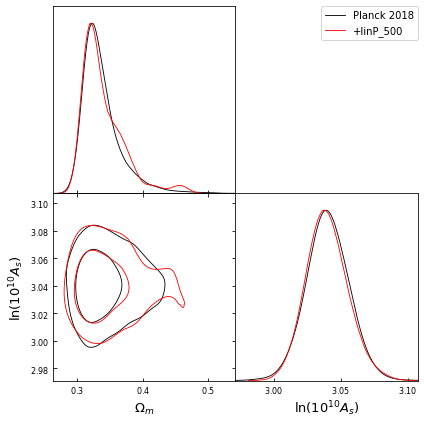

In [3]:
g = plots.getSubplotPlotter(width_inch=6)
g.settings.axes_fontsize = 9
g.settings.legend_fontsize = 11
g.triangle_plot([planck2018['samples'],planck2018_linP['samples']],
                ['omegam','logA',],legend_labels=['Planck 2018','+linP_500'])

### Plot linear power parameters from chain

((-2.3359607830314584, -2.289730656968542),
 (0.21975571334699712, 0.39571150465300287))

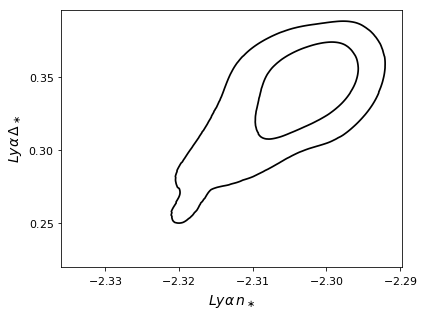

In [20]:
g = plots.getSinglePlotter()
g.plot_2d(planck2018_linP['samples'], ['linP_n_star', 'linP_DL2_star'])

### Plot linear parameters from Lyman alpha likelihoods

In [13]:
from cup1d.interface import marg_lya_like
import matplotlib.pyplot as plt

In [11]:
# create grid (note j in number of elements, crazy python)
neff_grid,DL2_grid = np.mgrid[-2.6:-2.1:100j, 0.2:0.7:100j]
chi2_PalanqueDelabrouille2015=marg_lya_like.gaussian_chi2_PalanqueDelabrouille2015(neff_grid,DL2_grid)
chi2_Chabanier2019=marg_lya_like.gaussian_chi2_Chabanier2019(neff_grid,DL2_grid)

Text(0, 0.5, '$\\Delta_p^2$')

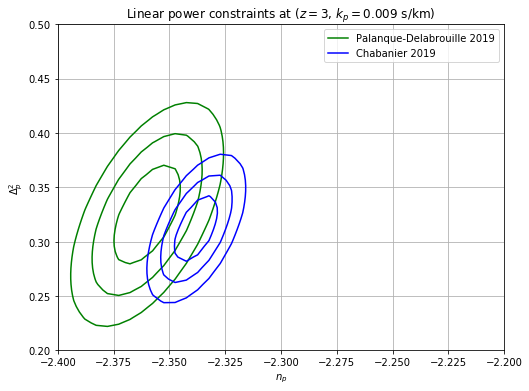

In [22]:
thresholds = [2.30,6.17,11.8]
plt.figure(figsize=[8,6])
plt.contour(neff_grid,DL2_grid,chi2_PalanqueDelabrouille2015,levels=thresholds,colors='green')
plt.contour(neff_grid,DL2_grid,chi2_Chabanier2019,levels=thresholds,colors='blue')
# hack to get legend entry for contours above
plt.axhline(y=1e10,color='green',label='Palanque-Delabrouille 2019')
plt.axhline(y=1e10,color='blue',label='Chabanier 2019')
plt.ylim(0.2,0.5)
plt.xlim(-2.4,-2.2)
plt.grid()                 
plt.legend()
plt.title(r'Linear power constraints at ($z=3$, $k_p=0.009$ s/km)')
plt.xlabel(r'$n_p$')
plt.ylabel(r'$\Delta_p^2$')